# Simple Linear Regression

In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('../../../../data/boston.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


Create a linear regression with `LSTAT` as predictor and `MEDV` as target.

With linear regression we suppose have a linear relation between predictor and target variables in this form:

$$
{y} = \beta_0 + \beta_1{x}
$$

The purpose is to find estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ such that 

$$
RSS = \sum_{i=0}^{n}{y_i - \hat{y_i}} = \sum_{i=0}^{n}{y_i - \hat{\beta_0} - \hat{\beta_1}x_i} = \sum_{i=0}^{n}{e_i}
$$ 

is minimized.
$RSS$ is called $\text{residual sum of squares}$

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

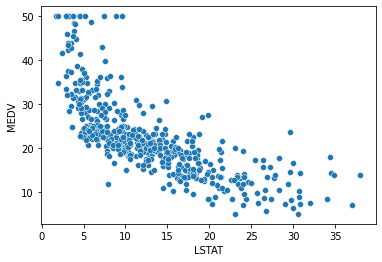

In [25]:
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

where

- $\bar{x}$: mean of $X$
- $\bar{y}$: mean of $Y$

In [22]:
X = df['LSTAT']
Y = df['MEDV']

beta_1 = ((X - X.mean()) * (Y - Y.mean())).sum()/((X - X.mean())**2).sum()
beta_0 = Y.mean() - (beta_1 * X.mean())

print(f'coef: {beta_1}')
print(f'intercept: {beta_0}')

coef: -0.9500493537579907
intercept: 34.5538408793831


## Performance analysis

### Residuals

$$
e = Y - \beta_0 - (\beta_1 * X)
$$

$$
RSS = \sum_{i=1}^{n}{e_i}^2
$$

In [27]:
e = Y - beta_0 - (beta_1 * X)
e.describe()

count    5.060000e+02
mean    -4.325043e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

In [38]:
e.var()

38.55917112539888

<AxesSubplot:ylabel='Density'>

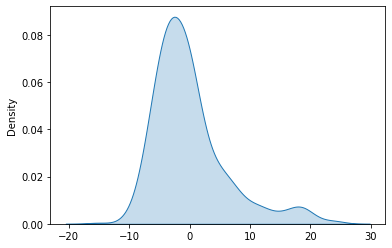

In [121]:
sns.kdeplot(e, fill=True)

### Residual Standard Error

It is in the unit of measure of $Y$

$$
RSE = \sqrt{\frac{\sum_{i=1}^{n}{e^2}}{n - 2}}
$$

In [101]:
np.sqrt((e ** 2).sum()/(X.size - 2))

6.215760405398069

$R^2$

It measures the proportion of variability in $Y$ that can be explained using X

$$
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
$$

where $TSS$ is the `total sum of squares`; it is represent the total variance in the response $Y$ before

$$
TSS = \sum_{i=1}^{n}{y_i - \bar{y}}
$$


In [108]:
tss = ((Y - Y.mean())**2).sum()
rss = (e**2).sum()

r2 = 1 - (rss/tss)
r2

0.5441462975864797

### Coefficient 

#### Standard Error

$$
SE(\beta_1) = \frac{var(\epsilon)}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}
$$

In [58]:
coefficient_se = np.sqrt(e.var()/(((X - X.mean())**2).sum()))
coefficient_se

0.03869504729166932

#### Confidence interval (95%)

In [67]:
coefficient_lower_bound = (beta_1 - (2 * coefficient_se))
coefficient_upper_bound = (beta_1 + (2 * coefficient_se))

print(coefficient_lower_bound)
print(coefficient_upper_bound)

-1.0274394483413294
-0.872659259174652


### Intercept

#### Standard Error

$$
SE(\beta_0) = var(\epsilon) * (\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}})
$$

In [61]:
intercept_se = np.sqrt(e.var() * (1/X.size + ((X.mean()**2) / ((X - X.mean())**2).sum())))
intercept_se

0.5620700221572504

#### Confidence interval (95%)

In [66]:
intercept_lower_bound = beta_0 - (2 * intercept_se)
intercept_upper_bound = beta_0 + (2 * intercept_se)

print(intercept_lower_bound)
print(intercept_upper_bound)

33.4297008350686
35.6779809236976


## Test with null hypothesis

$$
H_0: \beta_1 = 0
$$

$$
H_\alpha: \beta_1 \neq 0
$$

$$
t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}
$$

$t-statistic$ measures the number of standard deviations that $\hat{\beta_1}$ is away from 0

In [78]:
t_statistic = beta_1/coefficient_se
t_statistic

-24.55222102706998

In [100]:
p_value = t.sf(abs(t_statistic), df=X.size - 2)
p_value

1.9348050787494668e-88

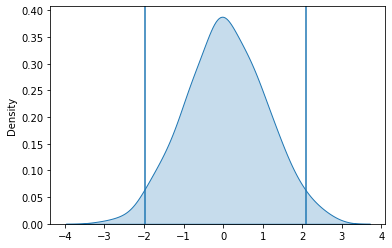

In [119]:
t_distribution = t.rvs(df=X.size - 2, size=X.size)
sns.kdeplot(t_distribution, fill=True)
plt.axvline(x=t_distribution.mean() - 2 * t_distribution.std())
plt.axvline(x=t_distribution.mean() + 2 * t_distribution.std())

`p_value` is less than 0.05 the che null hypothesis can be rejected 